In [ ]:
import os
import numpy as np 
import pandas as pd
import time
import gc
import time

In [ ]:
bool_columns = [ 'id', 'f22','f43','f242','f243','f244','f245','f246','f283','f284',
            'f247','f248','f249','f250','f251','f252',
            'f253','f254','f255','f256','f257','f258',
            'f259','f260','f261','f262','f263','f264',
            'f265','f266','f267','f268','f269','f270',
            'f271','f272','f273','f274','f275','f276',
            'f277','f278','f279','f280','f281','f282']

# Load data in traditional method with reduce memory

<div class="alert alert-info">
  <svg xmlns="http://www.w3.org/2000/svg" width="32" height="32" fill="currentColor" class="bi bi-info-circle-fill" viewBox="0 0 16 16">
  <path d="M8 16A8 8 0 1 0 8 0a8 8 0 0 0 0 16zm.93-9.412-1 4.705c-.07.34.029.533.304.533.194 0 .487-.07.686-.246l-.088.416c-.287.346-.92.598-1.465.598-.703 0-1.002-.422-.808-1.319l.738-3.468c.064-.293.006-.399-.287-.47l-.451-.081.082-.381 2.29-.287zM8 5.5a1 1 0 1 1 0-2 1 1 0 0 1 0 2z"/>
</svg>
</svg>
<b style="font-size: x-large;">MORE INFO</b><br>
Please see <a href="https://www.kaggle.com/c/tabular-playground-series-oct-2021/discussion/278237" target="_blank"><b>Reduce memory with Pandas</b></a><br>
</div>

In [ ]:
%%time
time_s_32 = time.time()

train_32 = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/train.csv',dtype='float32')
test_32 = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/test.csv',dtype='float32')
submission = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/sample_submission.csv')

for col in bool_columns:
    train_32[col] = train_32[col].astype(np.int8)
    test_32[col] = test_32[col].astype(np.int16)

train_32['target'] = train_32['target'].astype(np.int8)

time_e_32 = time.time()

time__32 = '{:.1f}'.format(time_e_32-time_s_32)
memory_32 = (train_32.memory_usage(index = True).sum() + test_32.memory_usage(index = True).sum() + submission.memory_usage(index = True).sum() )/ 1e9
memory_32_str = '{:.2f}'.format(memory_32)
types_32 = (train_32.dtypes).value_counts()

# Load data in traditional method

In [ ]:
%%time
time_s = time.time()

train = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/test.csv')
submission = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/sample_submission.csv')

time_e = time.time()

time__ = '{:.1f}'.format(time_e-time_s)
memory = (train.memory_usage(index = True).sum() + test.memory_usage(index = True).sum() + submission.memory_usage(index = True).sum() )/ 1e9
memory_str = '{:.2f}'.format(memory)
types = (train.dtypes).value_counts()

In [ ]:
print(f'{3*"="} Traditional method  {24*"="}\nMemory:\t{memory_str} gb\nTime:\t{time__} sec\n\n{types}\n\n')
print(f'{3*"="} Traditional method with reduce memory {5*"="}\nMemory:\t{memory_32_str} gb\nTime:\t{time__32} sec\n\n{types_32}')

# Load data in HDF method (all in one)

In [ ]:
%%time
time_s_h = time.time()

train_h5 = pd.read_hdf('/kaggle/input/all-booster-parameters-for-tps-oct-2021/train_32.h5',key='tps1021', mode='r')
test_h5 = pd.read_hdf('/kaggle/input/all-booster-parameters-for-tps-oct-2021/test_32.h5',key='tps1021', mode='r')
submission = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/sample_submission.csv')

time_e_h = time.time()

time__h = '{:.1f}'.format(time_e_h-time_s_h)
memory_h = (train_h5.memory_usage(index = True).sum() + test_h5.memory_usage(index = True).sum() + submission.memory_usage(index = True).sum() )/ 1e9
memory_h_str = '{:.2f}'.format(memory_h)
types_h = (train_h5.dtypes).value_counts()

In [ ]:
print(f'{3*"="} HDF method (all in one){18*"="}\nMemory:\t{memory_h_str} gb\nTime:\t{time__h} sec\n\n{types_h}')

In [ ]:
train_h5.shape

In [ ]:
train_h5.head()

# Load data in Feather method (all in one)

In [ ]:
%%time
time_s_f = time.time()

train_f = pd.read_feather('/kaggle/input/all-booster-parameters-for-tps-oct-2021/train_f.feather')
test_f = pd.read_feather('/kaggle/input/all-booster-parameters-for-tps-oct-2021/test_f.feather')
submission = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/sample_submission.csv')

time_e_f = time.time()

time__f = '{:.1f}'.format(time_e_f-time_s_f)
memory_f = (train_f.memory_usage(index = True).sum() + test_f.memory_usage(index = True).sum() + submission.memory_usage(index = True).sum() )/ 1e9
memory_f_str = '{:.2f}'.format(memory_f)
types_f = (train_f.dtypes).value_counts()

In [ ]:
print(f'{3*"="} Feather method (all in one){18*"="}\nMemory:\t{memory_f_str} gb\nTime:\t{time__f} sec\n\n{types_f}')

In [ ]:
train_f.shape

In [ ]:
train_f.head()

In [ ]:
print('With HDF method,     Data load {:.2f}% faster and {:.2f}% less memory'.format(100 * (time_e_32-time_s_32-time_e_h+time_s_h) / (time_e-time_s), 100 * (memory - memory_h) / memory))
print('With Feather method, Data load {:.2f}% faster and {:.2f}% less memory'.format(100 * (time_e_32-time_s_32-time_e_f+time_s_f) / (time_e-time_s), 100 * (memory - memory_f) / memory))

# How to use

First add the <a href="https://www.kaggle.com/akmeghdad/all-booster-parameters-for-tps-oct-2021" target="_blank"><b>A</b>ll <b>B</b>oosters <b>P</b>arameters</a> dataset from the top right of Kaggle code editor<br>

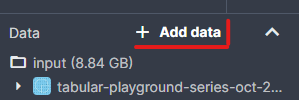

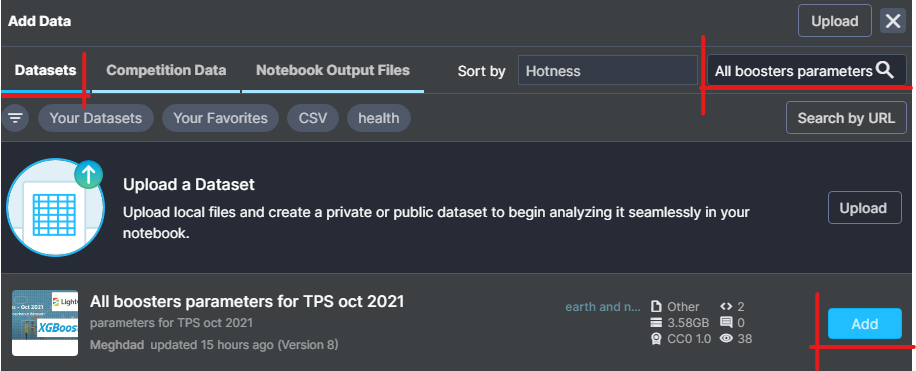

you could then load the data with the following codes 

In [ ]:
train_h5 = pd.read_hdf('/kaggle/input/all-booster-parameters-for-tps-oct-2021/train_32.h5',key='tps1021', mode='r')
test_h5 = pd.read_hdf('/kaggle/input/all-booster-parameters-for-tps-oct-2021/test_32.h5',key='tps1021', mode='r')
submission = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/sample_submission.csv')

<span style="font-size: 21px;">OR</span>

In [ ]:
train_f = pd.read_feather('/kaggle/input/all-booster-parameters-for-tps-oct-2021/train_f.feather')
test_f = pd.read_feather('/kaggle/input/all-booster-parameters-for-tps-oct-2021/test_f.feather')
submission = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/sample_submission.csv')

<div class="alert alert-success">
  <svg xmlns="http://www.w3.org/2000/svg" width="32" height="32" fill="currentColor" class="bi bi-star-fill" viewBox="0 0 16 16">
  <path d="M3.612 15.443c-.386.198-.824-.149-.746-.592l.83-4.73L.173 6.765c-.329-.314-.158-.888.283-.95l4.898-.696L7.538.792c.197-.39.73-.39.927 0l2.184 4.327 4.898.696c.441.062.612.636.282.95l-3.522 3.356.83 4.73c.078.443-.36.79-.746.592L8 13.187l-4.389 2.256z"/>
</svg>
<b style="font-size: x-large;">UPVOTE</b><br>
<b>I will try to create for future competitions as well if it is helpful for you,<br>If you think this notebook or <a href="https://www.kaggle.com/akmeghdad/all-booster-parameters-for-tps-oct-2021" target="_blank">this dataset</a> that i created are helpful for you, Please do not forget upvote this notebook and <a href="https://www.kaggle.com/akmeghdad/all-booster-parameters-for-tps-oct-2021" target="_blank">this dataset</a></b><br>
Thank you in advance 
</div>
